In [23]:
import sys
#sys.path.insert(1,'/Users/kailaiwang/Documents/AEI_Research/TEOBResumS/eccentric/python')
sys.path.insert(1,'/work/kailai.wang/teobresums/Python')
import EOBRun_module
import SEOBNRE
import sxs
import Functions as fun
from importlib import reload
fun=reload(fun)
import argparse
from configparser import ConfigParser
import corner
import os
import pandas as pd
import glob
import json
import numpy as np
from pycbc import psd
import h5py
from scipy.interpolate import interp1d
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import dynesty
from dynesty import plotting as dyplot
from pycbc.waveform import td_approximants
import pycbc.psd
from pycbc.pool import choose_pool
import csv
##########################
import aux_fun as functions
import SXS_module as sxs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,curve_fit
import romspline
import h5py
import math
from dynesty.utils import resample_equal
import corner
import json
import random

In [24]:
import csv
from os import listdir


def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

#filenames = find_csv_filenames("export_folder/sxs_mismatch_seobhm")
filenames = find_csv_filenames("export_folder/sxs_mismatch_tseob_new/")

data_file_list=[]
info_file_list=[]

for name in filenames:
    if "rit_mismatch" in name:
        #data_file_list.append("export_folder/sxs_mismatch_seobhm/"+name)
        data_file_list.append("export_folder/sxs_mismatch_tseob_new/"+name)

    
        
        

for name in filenames:
    if "model" in name:
        #info_file_list.append("export_folder/sxs_mismatch_seobhm/"+name)
        info_file_list.append("export_folder/sxs_mismatch_tseob_new/"+name)

data_list=[]

for i in data_file_list:
    with open(i, newline='') as csvfile:
        data_read = list(csv.reader(csvfile))
        data_list.append(data_read)



In [25]:
# import glob
# json_files=glob.glob('/work/francisco.jimenez/RIT/Metadata/*Metadata.json',recursive = True)

# import importlib
# importlib.reload(sxs)
# conditions=np.asarray([['BHBH',None],['Non-Precessing',None],['Eccentricity',['>=0.01','<=0.50']]])
# ritcat=sxs.SXS_catalogue("/work/francisco.jimenez/RIT/Data",conditions,catalogue="RIT")

# systems=np.array([ritcat.metadata(j,parameters_list=['catalog-tag','system-type','eccentricity','relaxed-mass-ratio-1-over-2',
#                                                      'final-mass','final-chi','initial-bh-chi1z','initial-bh-chi2z','freq-start-22']) for j in json_files])

# boolean= np.array(['e' in elist for elist in systems[:,0]])

# for i in range(len(systems)):
#     if 'e' in systems[:,0][i] and float(systems[:,2][i])<0.5:
#         boolean[i]=True
#     else:
#         boolean[i]=False

# ecc_prec_cases=systems[boolean]
# boolean = np.array(['Precessing' not in elist for elist in ecc_prec_cases])
# ecc_cases=ecc_prec_cases[boolean]
# ecc_cases[:,2]=np.array([float(i[2]) for i in ecc_cases])
# ecc_cases[:,3]=np.array([1/float(i[3]) for i in ecc_cases])
# ecc_cases[:,4]=np.array([float(i[4]) for i in ecc_cases])
# ecc_cases[:,5]=np.array([float(i[5]) for i in ecc_cases])
# ecc_tags=ecc_cases[:,0]


# h5_files=[glob.glob('/work/francisco.jimenez/RIT/Data/*'+j.replace(':','-')+'*',recursive = True)[0] for j in ecc_tags]


/work/kailai.wang/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


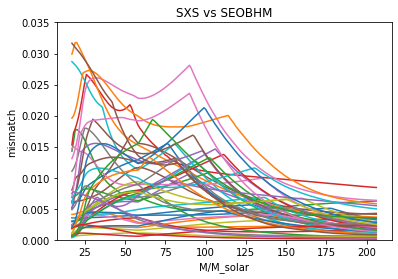

total analyzed:  46


In [26]:
import matplotlib.pyplot as plt
import numpy as np

name_list=[]
mismatch_list=[]
mass_list=[]

for i in range(0,len(data_list)):
    mismatch=[]
    mass=[]
    name=""
    for j in range(1,len(data_list[i])):
        if data_list[i][j][1]!='':
            mismatch_item=float(data_list[i][j][1])
            # if mismatch_item>=0.03:
            #     print("Problem." + str(i))
            mass_item=float(data_list[i][j][0])
            mismatch.append(mismatch_item)
            mass.append(mass_item)
    mismatch_list.append(mismatch)
    mass_list.append(mass)
    name_list.append(data_file_list[i])


    
for i in range(0,len(name_list)):
    plt.plot(mass_list[i],mismatch_list[i])
    plt.ylabel("mismatch")
    plt.xlabel("M/M_solar")
    plt.ylim(0,0.035)
    # plt.plot(mass_list[i],mismatch_list[i], label=data_file_list[i])
    # plt.legend(bbox_to_anchor=(0,0), loc="lower left")
#plt.ylim(0,0.1)
#plt.title("SXS vs TSEOB")
plt.title("SXS vs SEOBHM")
plt.show()
print("total analyzed: ", len(name_list))



In [27]:
# print(data_file_list[3])
# print(data_file_list[11])
# print(data_file_list[40])
# print(data_file_list[45])
# #1388, 1361, 0088(nope), 1359

In [28]:
#Make LATEX TABLE
max_mismatch_list = []
table_list=[]
for i in range(0,len(name_list)):
    ecc_bvals=-1
    f_bvals=-1
    max_mismatch = -1
    for k in mismatch_list[i]:
        if float(k)>max_mismatch:
            max_mismatch=k
    #find info_list for name_list[i]
    for j in range(0,len(info_file_list)):
        if name_list[i][67:71] in info_file_list[j]:
            #print(name_list[i][67:71] + " found " + info_file_list[j])
            with open(info_file_list[j], newline='') as csvfile:
                # print(name_list[i][67:71], info_file_list[j])
                info_read = list(csv.reader(csvfile))
                ecc_meta = info_read[1][6]
                ecc_bvals=info_read[1][9]
                f_bvals=info_read[1][10]
                f_bvals_new=fun.f_to_NR(float(f_bvals)/2.,100)*2*np.pi
    result = name_list[i][67:71] + ": " + " (TEOB) " + " ecc_bvals: " + str(np.round(float(ecc_bvals),5)) + " f0_bvals " + str(np.round(float(f_bvals_new),5))
    print(result)
                
                
    





1365:  (TEOB)  ecc_bvals: 0.2205 f0_bvals 0.00797
1373:  (TEOB)  ecc_bvals: 0.32644 f0_bvals 0.0096
0089:  (TEOB)  ecc_bvals: 0.11749 f0_bvals 0.00834
1388:  (TEOB)  ecc_bvals: 0.06121 f0_bvals 0.00912
1149:  (TEOB)  ecc_bvals: 0.1123 f0_bvals 0.00861
0179:  (TEOB)  ecc_bvals: 0.00433 f0_bvals 0.01369
0078:  (TEOB)  ecc_bvals: 0.06135 f0_bvals 0.00954
0320:  (TEOB)  ecc_bvals: 0.03948 f0_bvals 0.01315
0105:  (TEOB)  ecc_bvals: 0.00983 f0_bvals 0.01422
1356:  (TEOB)  ecc_bvals: 0.14667 f0_bvals 0.01124
1360:  (TEOB)  ecc_bvals: 0.31774 f0_bvals 0.01396
1361:  (TEOB)  ecc_bvals: 0.2889 f0_bvals 0.01347
0309:  (TEOB)  ecc_bvals: 0.05671 f0_bvals 0.00813
1364:  (TEOB)  ecc_bvals: 0.16847 f0_bvals 0.00869
0091:  (TEOB)  ecc_bvals: 0.01252 f0_bvals 0.01254
1357:  (TEOB)  ecc_bvals: 0.2944 f0_bvals 0.00927
0323:  (TEOB)  ecc_bvals: 0.14505 f0_bvals 0.01448
1371:  (TEOB)  ecc_bvals: 0.16844 f0_bvals 0.01167
0322:  (TEOB)  ecc_bvals: 0.1733 f0_bvals 0.00944
1368:  (TEOB)  ecc_bvals: 0.19321 f0_

In [29]:
?fun.f_to_NR

Signature: fun.f_to_NR(f, M)
Docstring:
It converts Physical frequencies to NR units in [1/M].
    
File:      ~/Eccentricity_project/Functions.py
Type:      function


In [30]:
# for i in range(0,len(data_list)):
#     found=False
#     for j in ecc_cases:
#         #print(j[0])
#         if  j[0] in name_list[i]:
#             ritwavename=str(j[0])
#             #print("Found! " + str(j[0]))
#             system_type=j[1]
#             #print("system type: " + str(system_type))
#             eccentricity = j[2]
#             #print("eccentricity "+str(eccentricity))
#             relaxed_mass_ratio_1_over_2=j[3][0]
#             #print("relaxed_mass_ratio_1_over_2: "+ str(relaxed_mass_ratio_1_over_2))
#             final_mass=j[4]
#             #print("final_mass: "+ str(final_mass))
#             final_chi=j[5]
#             #print("final_chi: "+ str(final_chi))
#             initial_bh_chi1z=j[6]
#             #print("initial_bh_chi1z: "+ str(initial_bh_chi1z))
#             initial_bh_chi2z=j[7]
#             #print("initial_bh_chi2z: "+ str(initial_bh_chi2z))
#             initial_freq=float(j[8])
#             #print("initial_freq: "+ str(initial_freq))
#             found=True
#         #if found==False:
#             #print("We tried to look for " + str(name_list[i]))
#         else:
#             c=""
#             if float(eccentricity)>=0.3: 
#                 c="red"
#             elif float(eccentricity)>0.1: 
#                 c="blue"
#             else:
#                 c="green"
#     for j in info_file_list:
#         if ritwavename in j:
#             with open(j, newline='') as csvfile:
#                 info_read = list(csv.reader(csvfile))
#                 ecc_est=info_read[1][7]
#                 ecc_bvals=info_read[1][9]
#                 f_bvals=info_read[1][10]
#     if c == "blue":
#         print(ritwavename+" estimate: "+ ecc_bvals + " mismatch:" + str(max(mismatch_list[i])))
#     plt.plot(mass_list[i],mismatch_list[i],color=c)
#     plt.ylabel("mismatch")
#     plt.xlabel("M/M_solar")
#     plt.title("Eccentricity: Red: 0.3-0.5; Blue: 0.1-0.3; Green: <0.1")
#     # plt.plot(mass_list[i],mismatch_list[i], label=data_file_list[i])
#     # plt.legend(bbox_to_anchor=(0,0), loc="lower left")
# plt.show()
# # print("Looks like low eccentric cases are behaving")


Make a table

In [31]:
# name_list=[]
# mismatch_list=[]
# mass_list=[]
# max_mismatch_list=[]
# max_mass_list=[]

# for i in range(0,len(data_list)):
# #for i in range(66,67):
#     mismatch=[]
#     mass=[]
#     name=""
#     bad_acc=0
#     max_mismatch=0
#     max_mass=0
#     for j in range(1,len(data_list[i])):
#         if data_list[i][j][1]!='' and float(data_list[i][j][0])<=200.:
#             mismatch_item=float(data_list[i][j][1])
#             if mismatch_item>=0.1:
#                 bad_acc+=1
#             mass_item=float(data_list[i][j][0])
#             mismatch.append(mismatch_item)
#             if mismatch_item>max_mismatch:
#                 max_mismatch=mismatch_item
#                 max_mass=mass_item
#             mass.append(mass_item)
                
#     if bad_acc<=1:
#         mismatch_list.append(mismatch)
#         mass_list.append(mass)
#         name_list.append(data_file_list[i])
#         #print(max_mismatch)
#         max_mismatch_list.append(max_mismatch)
#         #print(max_mass)
#         max_mass_list.append(max_mass)
        
# # print(len(name_list))
# # print(len(max_mass_list))
# name_array=[]
# mismatch_array=[]
# mass_array=[]
# ecc_meta_array=[]
# mass_ratio_array=[]
# ecc_est_array=[]
# ecc_bvals_array=[]
# f_bvals_array=[]
# spin_array=[]

# print("   name      |max mismatch| max mismatch mass |meta eccentricity| mass ratio | ecc est | ecc bvals | f bvals")
# for i in range(0,len(name_list)):
#     name = name_list[i]
#     name = name[59:72]
#     name_array.append(name)
#     mismatch_array.append(np.around(max_mismatch_list[i],4))
#     mass_array.append(max_mass_list[i])
#     #Get meta data
#     ecc=-1
#     mass_ratio=-1
#     #CHANGE THIS
#     for j in ecc_cases:
#         # print(j[0])
#         # print(name_list[i])
#         if  j[0] in name_list[i]:
#             ritwavename=str(j[0])
#             system_type=j[1]
#             ecc = j[2]
#             mass_ratio=j[3]
#             final_mass=j[4]
#             final_chi=j[5]
#             initial_bh_chi1z=j[6]
#             initial_bh_chi2z=j[7]
#             initial_freq=float(j[8])
            
#     #spin calculation
#     # goal: spin1*m1+spin2*m2 normalized 
#     # m1/m2=Q and m1+m2=1
#     # m1=Q/(1+Q) and m2=1/(1+Q)
    
#     #looks good
#     m1=float(mass_ratio)/(float(mass_ratio)+1)
#     m2=1/(float(mass_ratio)+1)
#     spin_array.append(m1*float(initial_bh_chi1z)+m2*float(initial_bh_chi2z))  
#     ecc_meta_array.append(ecc)
#     mass_ratio_array.append(np.around(float(mass_ratio),3))
#     #Get bvals
#     for j in info_file_list:
#         if name in j:
#             with open(j, newline='') as csvfile:
#                 info_read = list(csv.reader(csvfile))
#                 ecc_est=info_read[1][7]
#                 ecc_bvals=info_read[1][9]
#                 f_bvals=info_read[1][10]
                
#                 ecc_est_array.append(np.round(float(ecc_est),4))
#                 ecc_bvals_array.append(np.round(float(ecc_bvals),4))
#                 f_bvals_array.append(np.round(float(f_bvals),4))
                
    
#     #print(name_array[i], "   ", mismatch_array[i], "     ",  mass_array[i], "             ", 
#           # ecc_meta_array[i], "          ", mass_ratio_array[i], "      ",ecc_est_array[i],  "    ",
#           # ecc_bvals_array[i], "    " , f_bvals_array[i])


    

   name      |max mismatch| max mismatch mass |meta eccentricity| mass ratio | ecc est | ecc bvals | f bvals


ZeroDivisionError: float division by zero

In [ ]:
#MASS RATIO ECCENTRICITY PLOT
print("total data points" + str(len(name_list)))
plot_data=[]
color_array=[]
for i in range(0,len(name_list)):
    if mismatch_array[i]>=0.1:
        c='red'
    elif mismatch_array[i]>=0.05:
        c='blue'
    elif mismatch_array[i]>=0.01:
        c='green'
    else:
        c='black'
    plot_data.append([mass_ratio_array[i],float(ecc_bvals_array[i])])
    color_array.append(c)
plot_data=np.array(plot_data)

plt.scatter(plot_data[:,0],plot_data[:,1],s=50,color=color_array)
plt.xlabel("mass ratio Q")
plt.ylabel("Bvals eccentricity")
plt.title("Max mismatch color: red>0.1, blue 0.05-0.1, green 0.01-0.05, black<0.01")
plt.show()
print("low mass ratio means higher mismatch?")

In [ ]:
#SPIN ECCENTRICITY PLOT

#MASS RATIO ECCENTRICITY PLOT
print("total data points" + str(len(name_array)))
plot_data=[]
color_array=[]
for i in range(0,len(name_array)):
    if mismatch_array[i]>=0.1:
        c='red'
    elif mismatch_array[i]>=0.05:
        c='blue'
    elif mismatch_array[i]>=0.01:
        c='green'
    else:
        c='black'
    plot_data.append([spin_array[i],float(ecc_bvals_array[i])])
    color_array.append(c)
plot_data=np.array(plot_data)

plt.scatter(plot_data[:,0],plot_data[:,1],s=50,color=color_array)
plt.xlabel("Spin (spin1*m1+spin2*m2, mass normalized)")
plt.ylabel("Bvals eccentricity")
plt.title("Max mismatch color: red>0.1, blue 0.05-0.1, green 0.01-0.05, black<0.01")
plt.show()
#print("high spin means high mismatch!")